# DonorsChoose.org Application Screening

## 题目描述
DonorsChoose.org由布朗克斯的一名高中教师于2000年创立，授权来自全国各地的公立学校教师为学生提供急需的材料和经验。 在任何特定时间，都有成千上万的课堂要求，可以通过任意数量的礼物来实现。
DonorsChoose.org每年收到数十万个项目提案，用于需要资助的课堂项目。 现在，需要大量志愿者手动筛选每个提交，然后才能在DonorsChoose.org网站上发布。

明年，DonorsChoose.org预计将收到近500,000个项目提案。 因此，他们需要解决三个主要问题：
１．如何扩展当前的手动流程和资源，以筛选500,000个项目，以便尽可能快速有效地发布它们
２．如何提高不同志愿者项目审核的一致性，改善教师的体验
３．如何将志愿者时间集中在需要最多帮助的应用程序上

比赛的目标是使用项目描述的文本以及关于项目，教师和学校的其他元数据来预测教师提交的DonorsChoose.org项目提案是否会被批准。 然后，DonorsChoose.org可以在批准之前使用此信息来识别最有可能需要进一步审核的项目。

通过预筛选应用程序的算法，DonorsChoose.org可以快速自动批准某些应用程序，以便志愿者可以将时间花在更细致和详细的项目审查流程上，包括做更多工作来帮助教师开发符合特定资助机会的项目。

您的机器学习算法可以帮助更多教师更快地获得资助，并且DonorsChoose.org的成本更低，从而可以将更多资金直接用于全国各地的教室。

## 数据描述

### 文件
train.csv - 训练集
test.csv - t
resources.csv - 每个提案需要的资源; joins with test.csv and train.csv on id
sample_submission.csv - 提交格式样例文件
### 数据字段
test.csv and train.csv:

id - unique id of the project application
teacher_id - id of the teacher submitting the application
teacher_prefix - title of the teacher's name (Ms., Mr., etc.)
school_state - US state of the teacher's school
project_submitted_datetime - application submission timestamp
project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)
project_subject_categories - category of the project (e.g., "Music & The Arts")
project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")
project_title - title of the project
project_essay_1 - first essay*
project_essay_2 - second essay*
project_essay_3 - third essay*
project_essay_4 - fourth essay*
project_resource_summary - summary of the resources needed for the project
teacher_number_of_previously_posted_projects - number of previously posted applications by the submitting teacher
project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); train.csv only
* Note: Prior to May 17, 2016, the prompts for the essays were as follows:

project_essay_1: "Introduce us to your classroom"
project_essay_2: "Tell us more about your students"
project_essay_3: "Describe how your students will use the materials you're requesting"
project_essay_4: "Close by sharing why your project will make a difference"
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

对于project_submitted_datetime为2016-05-17及更高版本的所有项目，project_essay_3和project_essay_4的值将为NaN。

resources.csv:
提案还包括要求的资源。 每个项目可能包含多个请求的资源。 resources.csv中的每一行对应一个资源，因此多行可以通过id绑定到同一个项目。
id - unique id of the project application; joins with test.csv. and train.csv on id
description - description of the resource requested
quantity - quantity of resource requested
price - price of resource requested

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 读取数据

In [2]:
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")
resources_df = pd.read_csv("input/resources.csv")

c:\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


## 分析每项特征唯一值数量占比和缺失信息

In [4]:
missing_df = train_df.isnull().sum(axis=0)
for column in train_df.columns:
    print (column + " unique value num, percentage and missing percentage: {}, {}, {}".format(train_df[column].unique().shape[0], train_df[column].unique().shape[0] / train_df.shape[0], missing_df[column] / train_df.shape[0]))

id unique value num, percentage and missing percentage: 182080, 1.0, 0.0
teacher_id unique value num, percentage and missing percentage: 104414, 0.573451230228471, 0.0
teacher_prefix unique value num, percentage and missing percentage: 6, 3.295254833040422e-05, 2.1968365553602813e-05
school_state unique value num, percentage and missing percentage: 51, 0.0002800966608084358, 0.0
project_submitted_datetime unique value num, percentage and missing percentage: 180439, 0.9909874780316345, 0.0
project_grade_category unique value num, percentage and missing percentage: 4, 2.1968365553602813e-05, 0.0
project_subject_categories unique value num, percentage and missing percentage: 51, 0.0002800966608084358, 0.0
project_subject_subcategories unique value num, percentage and missing percentage: 407, 0.002235281195079086, 0.0
project_title unique value num, percentage and missing percentage: 164282, 0.9022517574692442, 0.0
project_essay_1 unique value num, percentage and missing percentage: 147689

## 分析id 列
 从 上面我们看到id列唯一值得占比达到100%，所以可以丢弃此列

## 分析teacher_id列
teacher_id列的唯一值占百分比达到57%，说明一个老师不止申请了一个项目，我们因此衍生出新列：每个老师申请项目的数量

## 分析teacher_prefix列
该列为老师姓名的称呼值为（mr.mrs..)，唯一值数量为5，可以将该特征作为一个类别变量

In [5]:
train_df['teacher_prefix'].unique().tolist()

['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan]

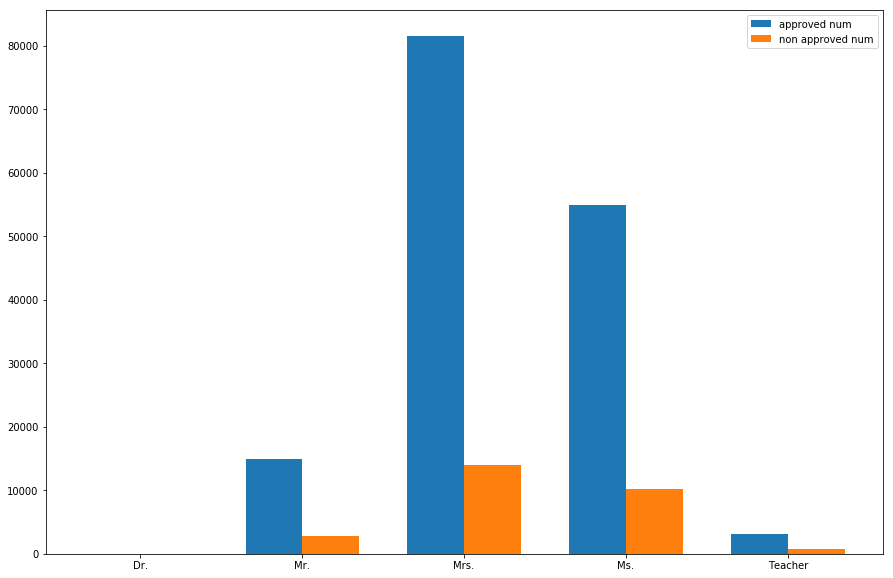

In [43]:
# 统计申请教师称呼和申请通过数量的关系。
tmp = train_df[['teacher_prefix', 'project_is_approved', 'id']].groupby(['teacher_prefix', 'project_is_approved'])['id'].count().reset_index().rename(index=str, columns={"id": 'num'})
approved_num_by_prefix = tmp[tmp['project_is_approved'] == 1]
non_approved_num_by_prefix = tmp[tmp['project_is_approved'] == 0]
label = approved_num_by_prefix['teacher_prefix'].tolist()
bar_width = 0.35
index = np.arange(len(label))
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(index, approved_num_by_prefix['num'], bar_width,label = 'approved num')
ax.bar(index + bar_width, non_approved_num_by_prefix['num'], bar_width, label = 'non approved num')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()
plt.show()

## 分析school_state列
该特征为教师所在学校的状态

In [44]:
train_df['school_state'].unique()

array(['NV', 'GA', 'UT', 'NC', 'CA', 'DE', 'MO', 'SC', 'IN', 'IL', 'VA',
       'PA', 'NY', 'FL', 'NJ', 'TX', 'LA', 'ID', 'OH', 'OR', 'MD', 'WA',
       'MA', 'KY', 'AZ', 'MI', 'CT', 'AR', 'WV', 'NM', 'WI', 'MN', 'OK',
       'AL', 'TN', 'IA', 'KS', 'CO', 'DC', 'WY', 'NH', 'HI', 'SD', 'MT',
       'MS', 'RI', 'VT', 'ME', 'NE', 'AK', 'ND'], dtype=object)

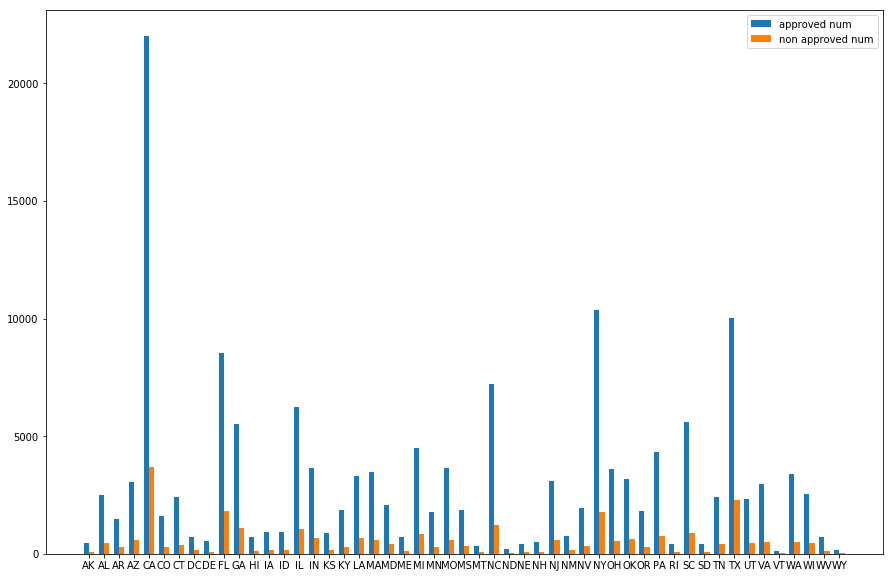

In [7]:
tmp = train_df[['school_state', 'project_is_approved', 'id']].groupby(['school_state', 'project_is_approved'])['id'].count().reset_index().rename(index=str, columns={"id": 'num'})
approved_num_by_school_state = tmp[tmp['project_is_approved'] == 1]
non_approved_num_by_school_state = tmp[tmp['project_is_approved'] == 0]
label = approved_num_by_school_state['school_state'].tolist()
bar_width = 0.35
index = np.arange(len(label))
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(index, approved_num_by_school_state['num'], bar_width,label = 'approved num')
ax.bar(index + bar_width, non_approved_num_by_school_state['num'], bar_width, label = 'non approved num')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()
plt.show()

## 分析project_submitted_datetime列
该列为项目提交的时间，从里面我们提取出项目提交的年份、月份、天等信息。

In [8]:
train_df['project_submitted_datetime'] = train_df['project_submitted_datetime'].astype('datetime64')
train_df['project_submitted_year'] = train_df['project_submitted_datetime'].dt.year
train_df['project_submitted_month'] = train_df['project_submitted_datetime'].dt.month
train_df['project_submitted_day'] = train_df['project_submitted_datetime'].dt.day

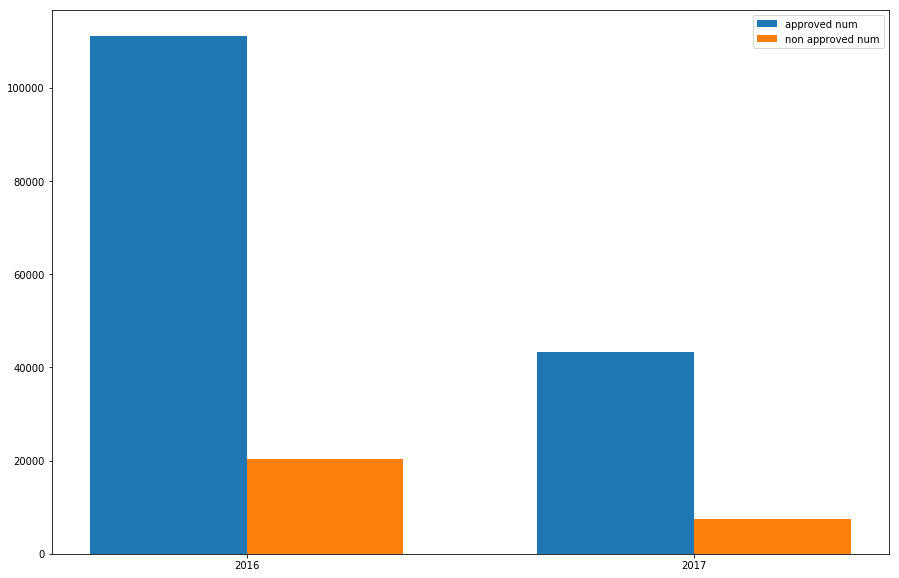

In [9]:
tmp = train_df[['project_submitted_year', 'project_is_approved', 'id']].groupby(['project_submitted_year', 'project_is_approved'])['id'].count().reset_index().rename(index=str, columns={"id": 'num'})
approved_num_by_school_state = tmp[tmp['project_is_approved'] == 1]
non_approved_num_by_school_state = tmp[tmp['project_is_approved'] == 0]
label = approved_num_by_school_state['project_submitted_year'].tolist()
bar_width = 0.35
index = np.arange(len(label))
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(index, approved_num_by_school_state['num'], bar_width,label = 'approved num')
ax.bar(index + bar_width, non_approved_num_by_school_state['num'], bar_width, label = 'non approved num')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()
plt.show()

In [10]:
tmp = train_df[['project_submitted_year','project_submitted_month', 'project_is_approved', 'id']].groupby(['project_submitted_year','project_submitted_month', 'project_is_approved'])['id'].count().reset_index().rename(index=str, columns={"id": 'num'})
tmp


,project_submitted_year,project_submitted_month,project_is_approved,num
0,2016,4,0,165
1,2016,4,1,1248
2,2016,5,0,1288
3,2016,5,1,8339
4,2016,6,0,1279
5,2016,6,1,7772
6,2016,7,0,2244
7,2016,7,1,10815
8,2016,8,0,5258
9,2016,8,1,28120


## 分析project_grade_category列
该列为学校成绩水平，取值有'Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'

In [11]:
train_df['project_grade_category'].unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'],
      dtype=object)

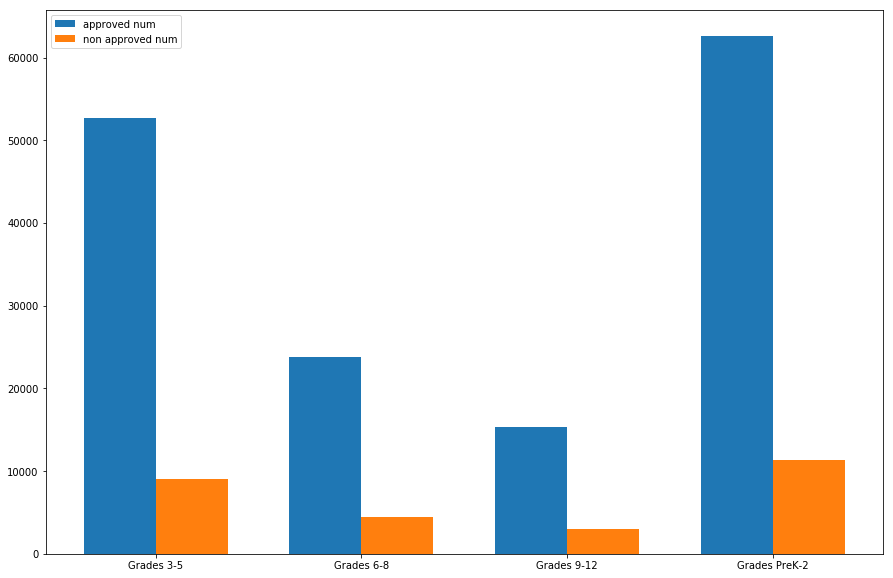

In [12]:
tmp = train_df[['project_grade_category','project_is_approved', 'id']].groupby(['project_grade_category', 'project_is_approved'])['id'].count().reset_index().rename(index=str, columns={"id": 'num'})
approved_num_by_school_state = tmp[tmp['project_is_approved'] == 1]
non_approved_num_by_school_state = tmp[tmp['project_is_approved'] == 0]
label = approved_num_by_school_state['project_grade_category'].tolist()
bar_width = 0.35
index = np.arange(len(label))
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(index, approved_num_by_school_state['num'], bar_width,label = 'approved num')
ax.bar(index + bar_width, non_approved_num_by_school_state['num'], bar_width, label = 'non approved num')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()
plt.show()

## 分析project_subject_categories列
该列为项目类别列，唯一值数量为51，

In [22]:
tmp = train_df['project_subject_categories'].str.split(",").tolist()

In [25]:
approve_num_by_category = {}
for i in range(len(tmp)):
    for sub_category in tmp[i]:
        sub_category = sub_category.strip()
        if sub_category not in approve_num_by_category.keys():
            approve_num_by_category[sub_category] = {}
        if train_df.iloc[i, -1] == 1:
            approve_num_by_category[sub_category]['approveNum'] = approve_num_by_category[sub_category].get('approveNum', 0) + 1
        else:
            approve_num_by_category[sub_category]['disapproveNum'] = approve_num_by_category[sub_category].get('disapproveNum', 0) + 1
print (approve_num_by_category)

{'Literacy & Language': {'disapproveNum': 82482, 'approveNum': 4506}, 'History & Civics': {'disapproveNum': 9211, 'approveNum': 515}, 'Health & Sports': {'disapproveNum': 21894, 'approveNum': 1818}, 'Care & Hunger': {'disapproveNum': 2275, 'approveNum': 52}, 'Music & The Arts': {'disapproveNum': 16215, 'approveNum': 839}, 'Warmth': {'disapproveNum': 2275, 'approveNum': 52}, 'Math & Science': {'approveNum': 4091, 'disapproveNum': 65157}, 'Applied Learning': {'disapproveNum': 19336, 'approveNum': 967}, 'Special Needs': {'disapproveNum': 21761, 'approveNum': 1120}}


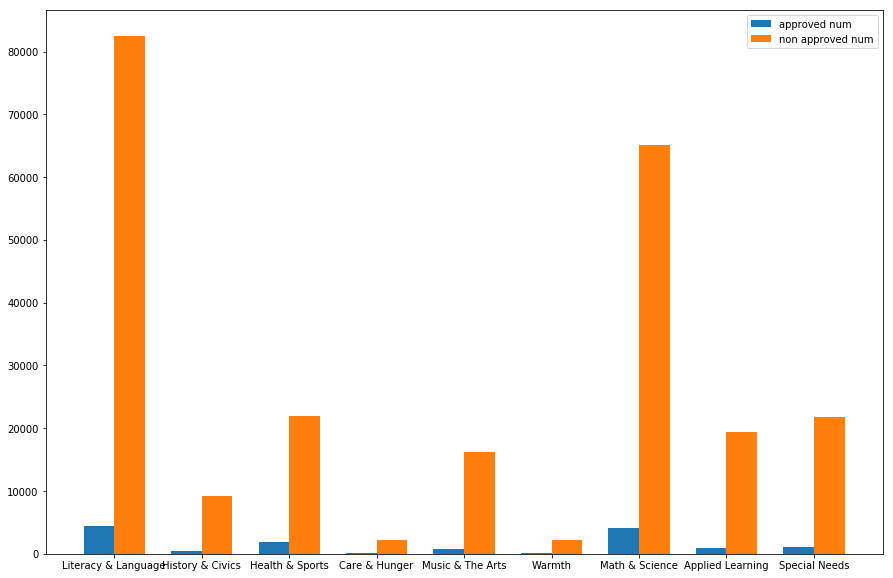

In [28]:
label = approve_num_by_category.keys()
approve_num_list= [approve_num_by_category[i]['approveNum'] for i in approve_num_by_category.keys()]
disapprove_num_list= [approve_num_by_category[i]['disapproveNum'] for i in approve_num_by_category.keys()]
bar_width = 0.35
index = np.arange(len(label))
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(index, approve_num_list, bar_width,label = 'approved num')
ax.bar(index + bar_width, disapprove_num_list, bar_width, label = 'non approved num')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()
plt.show()

In [21]:
train_df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_submitted_year', 'project_submitted_month',
       'project_submitted_day'],
      dtype='object')

In [50]:
tmp = train_df['project_subject_categories'].apply(lambda x: len(x.split(",")))
tmp.max()

3

## 分析project_subject_subcategories列
该列为项目的子类别，唯一值数量有500个，一个项目的字类别可能包含多个类别，从下面的统计可以发现，一个项目最大的子类别数为3

In [47]:
train_df['project_subject_subcategories'].unique()

array(['Literacy', 'Performing Arts, Team Sports',
       'Applied Sciences, Literature & Writing', 'Health & Wellness',
       'Character Education, Literature & Writing',
       'Early Development, Literature & Writing', 'Mathematics',
       'Literature & Writing, Mathematics', 'Literacy, Mathematics',
       'Character Education, Literacy', 'Literature & Writing',
       'Special Needs', 'ESL, Mathematics',
       'Health & Life Science, Mathematics',
       'College & Career Prep, Literature & Writing',
       'Early Development, Special Needs', 'Applied Sciences',
       'Early Development, Performing Arts', 'Mathematics, Special Needs',
       'Environmental Science, Literature & Writing',
       'Health & Wellness, Special Needs', 'Other, Special Needs',
       'Literacy, Social Sciences',
       'Health & Wellness, Literature & Writing', 'Music',
       'Literacy, Special Needs', 'Applied Sciences, Mathematics',
       'ESL, Literacy', 'Applied Sciences, Special Needs',
      

In [49]:
tmp = train_df['project_subject_subcategories'].apply(lambda x: len(x.split(",")))
tmp.max()

3

## 分析project_title列
改列为项目的标题列，想法是利用nltk处理该列，先分析出高频词汇，建立高频词汇来处理

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(train_df['project_title'])
analyze = vectorizer.build_analyzer()

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(train_df['project_title'])

TypeError: no supported conversion for types: (dtype('O'),)

In [54]:
analyze("Super Sight Word Centers")

['super', 'sight', 'word', 'centers']

In [51]:
train_df['project_title'].unique()

array(['Super Sight Word Centers', 'Keep Calm and Dance On',
       'Lets 3Doodle to Learn', ...,
       '\\"Sew\\" you think you can design costumes!',
       'Can I go to the library?', 'Reader Leaders!'], dtype=object)

## 分析project_essay_1列

In [62]:
train_df['project_essay_1']

0         Most of my kindergarten students come from low...
1         Our elementary school is a culturally rich sch...
2         Hello;\r\nMy name is Mrs. Brotherton. I teach ...
3         My students are the greatest students but are ...
4         My students are athletes and students who are ...
5         My kids tell me each day that they want to mak...
6         Kindergarten is the new first grade. My studen...
7         First graders are fantastic! They are excited ...
8         My seventh graders dream big. They can't wait ...
9         I teach first grade in a small farming town in...
10        My classroom has 24 students in it. We have an...
11        My children come to school everyday with the s...
12        My school is located in a high poverty area, j...
13        Each day my fifth graders walk into our \"home...
14        The children at our school come from a variety...
15        My third graders are eager to learn new concep...
16        My students are Hispanics, Spa

## 分析projecte_essay_2列

## 分析project_essay_3列
提交日期大于2016-5-17后项目文章由4篇减少到2篇，所以2016-5-17后project_essay_3和project_essay_4为NaN

## 分析project_essay_4列

## 分析project_resource_summary

## 分析teacher_number_of_previously_posted_projects

## 分析prject_is_approved
目标变量，也是我们要预测的是变量，项目是否通过。由此可知我们要建立的模型为二分类模型。由正负比例可知数据为非平衡数据。

In [63]:
train_df['project_is_approved'].unique()

array([1, 0], dtype=int64)

In [64]:
train_df[train_df['project_is_approved'] == 1].shape[0] / train_df.shape[0]

0.8476823374340949

In [26]:
train_df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,project_submitted_year,project_submitted_month,project_submitted_day
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,2016,11,18
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,2017,4,26
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,2017,1,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,2016,8,12
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,2016,8,6


In [29]:
df = resources_df[['id', 'price']].groupby(['id'])['price'].count()

In [30]:
df.max()

100

In [41]:
missing_df = train_df.isnull().sum(axis=0)
missing_df['id']

0

In [38]:
train_df['project_title'].apply(lambda x: len(x))

0         24
1         22
2         21
3         72
4         48
5         37
6         21
7         36
8         37
9         27
10        26
11        17
12        29
13        52
14        16
15        13
16        29
17        41
18        19
19        26
20        37
21        54
22        38
23        36
24        35
25        51
26        28
27        20
28        35
29        12
          ..
182050    50
182051    15
182052    16
182053    51
182054    20
182055    40
182056    57
182057    65
182058    42
182059    67
182060    29
182061    24
182062    22
182063    31
182064    47
182065    27
182066    20
182067    22
182068    65
182069    45
182070    43
182071    30
182072    39
182073    14
182074    18
182075    13
182076    42
182077    21
182078    24
182079    15
Name: project_title, Length: 182080, dtype: int64